# Demographic data analizer

Created by Darío López Díaz. Work in progress..

The idea of this project is to analize demographic data, which consist of education, race, income and work time per week data of people from different countries. We will compute several values of interest, along the data. The data frame is coming from: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository&nbsp;[http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The data looks in the following way: 

In [12]:
df = pd.read_csv('adult.data.csv') 
df.head()  

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


People of each race:

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64


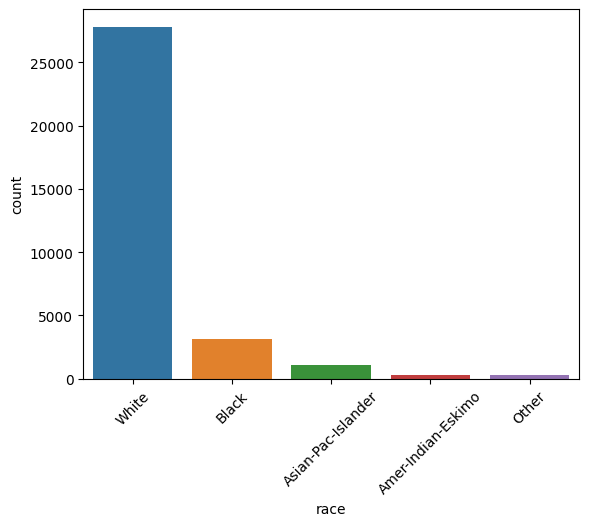

In [3]:
print(df.groupby('race').size())
sns.countplot(data=df,x='race') 
plt.xticks(rotation=45)
plt.show()

Average age of men:

In [4]:
df[['age','sex']].set_index('sex').drop(index='Female').mean()

age    39.433547
dtype: float64

Percentage of Bachelors:

In [5]:
df.filter(items=['education']).value_counts()['Bachelors'] / df.filter(items=['education']).value_counts().sum() * 100

16.44605509658794

Percentage of Bachelors, Masters or PhDs that make more than 50k:

In [6]:
Salary_Degree = df.filter(items=['education','salary']).value_counts()['Bachelors']+df.filter(items=['education','salary']).value_counts()['Masters']+df.filter(items=['education','salary']).value_counts()['Doctorate']
NumOf_Degree = df.filter(items=['education']).value_counts()['Bachelors']+df.filter(items=['education']).value_counts()['Masters']+df.filter(items=['education']).value_counts()['Doctorate']
((Salary_Degree / NumOf_Degree)*100)['>50K']

46.535843011613935

Percentage of people without advanced education that make more than 50K:

In [7]:
Non_Advance = df.filter(items=['education','salary']).value_counts().drop(labels=['Bachelors','Masters','Doctorate'])
Non_Advance_More50 = Non_Advance.drop(labels=['<=50K'],level=1).sum()
Non_Advance_Less50 = Non_Advance.drop(labels=['>50K'],level=1).sum()
Non_Advance_More50 / (Non_Advance_More50 + Non_Advance_Less50) * 100

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


17.3713601914639

Minimum number of hours a person works per week:

In [8]:
df['hours-per-week'].min()

1

Percentage of the people who work the minimum number of hours per week have a salary of more than 50K:

In [9]:
Min_Hours_More50 = df[df['hours-per-week']==1]['salary'].value_counts()['>50K'] 
Min_Hours_Total = df[df['hours-per-week']==1]['salary'].value_counts().sum() 
Min_Hours_More50 / Min_Hours_Total *100 

10.0

Country with the highest percentage of people that earn >50K:

In [10]:
People_Over50byCountry = df[['native-country','salary']].set_index('salary').drop(labels='<=50K').groupby('native-country').size()
print(People_Over50byCountry.idxmax())
People_Over50byCountry.max() / People_Over50byCountry.sum() * 100

United-States


91.45517153424308

Most popular occupation for those who earn >50K in India

In [11]:
People_More50 = df[['occupation','native-country','salary']].set_index('salary').drop(labels='<=50K')
People_More50_India = People_More50.set_index('native-country').loc['India'] 
People_More50_India.groupby('occupation').size().idxmax()

'Prof-specialty'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=caf0ee73-17ac-4035-9126-7542698c8712' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>